# Mid term November 15, 2024

In [110]:
import sympy
import math
from IPython.display import display, Math
from robotic.manipulator import JointType, Manipulator
from robotic.utils import draw_frame
from robotic.transformations import (
    Axis,
    EulerOrder,
    EulerSequence,
    HomogeneousTransformation,
    Rotation,
    Translation,
    X,
    Y,
    Z,
)


# Excercise 1

In [111]:
alpha, beta, phi, chi, psi = sympy.symbols("alpha beta phi chi psi")

In [112]:
r_1 = Rotation.from_axis_angle(Z,alpha) @ Rotation.from_axis_angle(Y,beta)
r_1

Matrix([
[cos(alpha)*cos(beta), -sin(alpha), sin(beta)*cos(alpha)],
[sin(alpha)*cos(beta),  cos(alpha), sin(alpha)*sin(beta)],
[          -sin(beta),           0,            cos(beta)]])

In [113]:
r_2 = Rotation.from_euler((phi,chi,psi), EulerSequence.XYZ, order = EulerOrder.FIXED)
r_2

Matrix([
[                              cos(chi)*cos(psi),                              -sin(psi)*cos(chi),           sin(chi)],
[ sin(chi)*sin(phi)*cos(psi) + sin(psi)*cos(phi), -sin(chi)*sin(phi)*sin(psi) + cos(phi)*cos(psi), -sin(phi)*cos(chi)],
[-sin(chi)*cos(phi)*cos(psi) + sin(phi)*sin(psi),  sin(chi)*sin(psi)*cos(phi) + sin(phi)*cos(psi),  cos(chi)*cos(phi)]])

In [114]:
Rotation.from_euler((psi,chi,phi), EulerSequence.ZYX, order = EulerOrder.MOVING)

Matrix([
[                              cos(chi)*cos(psi),                              -sin(psi)*cos(chi),           sin(chi)],
[ sin(chi)*sin(phi)*cos(psi) + sin(psi)*cos(phi), -sin(chi)*sin(phi)*sin(psi) + cos(phi)*cos(psi), -sin(phi)*cos(chi)],
[-sin(chi)*cos(phi)*cos(psi) + sin(phi)*sin(psi),  sin(chi)*sin(psi)*cos(phi) + sin(phi)*cos(psi),  cos(chi)*cos(phi)]])

In [115]:
(phi,chi,psi),*_ =r_1.to_euler(sequence = EulerSequence.XYZ, order = EulerOrder.FIXED)
display(Math(r"\phi = " + f"{phi}"))
display(Math(r"\chi = " + f"{chi}"))
display(Math(r"\psi = " + f"{psi}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [116]:
numerical_values = {"alpha": sympy.pi/4, "beta": -sympy.pi/3}
 
display(Math(r"\phi = " + f"{phi.subs(numerical_values).evalf()}"))
display(Math(r"\chi = " + f"{chi.subs(numerical_values).evalf()}"))
display(Math(r"\psi = " + f"{psi.subs(numerical_values).evalf()}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Excercise 2

In [117]:
gamma, delta = sympy.symbols("gamma delta")
v = Axis(1/sympy.sqrt(2),-1/sympy.sqrt(2),0)
rotation =  Rotation.from_axis_angle(v,delta) @ Rotation.from_axis_angle(X,gamma)
rotation

Matrix([
[  cos(delta)/2 + 1/2, (cos(delta)/2 - 1/2)*cos(gamma) - sqrt(2)*sin(delta)*sin(gamma)/2, -(cos(delta)/2 - 1/2)*sin(gamma) - sqrt(2)*sin(delta)*cos(gamma)/2],
[  cos(delta)/2 - 1/2, (cos(delta)/2 + 1/2)*cos(gamma) - sqrt(2)*sin(delta)*sin(gamma)/2, -(cos(delta)/2 + 1/2)*sin(gamma) - sqrt(2)*sin(delta)*cos(gamma)/2],
[sqrt(2)*sin(delta)/2,           sqrt(2)*sin(delta)*cos(gamma)/2 + sin(gamma)*cos(delta),           -sqrt(2)*sin(delta)*sin(gamma)/2 + cos(delta)*cos(gamma)]])

In [118]:
rotation.subs(
    {"gamma" : -sympy.pi/2,"delta": sympy.pi/3}
).evalf().round()

Matrix([
[  0.75, 0.6124,  -0.25],
[ -0.25, 0.6124,   0.75],
[0.6124,   -0.5, 0.6124]])

In [119]:
r,theta = rotation.subs(
    {"gamma" : -sympy.pi/2,"delta": sympy.pi/3}
).evalf().to_axis_angle()
display(Math(r"\bold{r} = " + f"{r}"))
display(Math(r"\theta = " + f"{theta}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 4

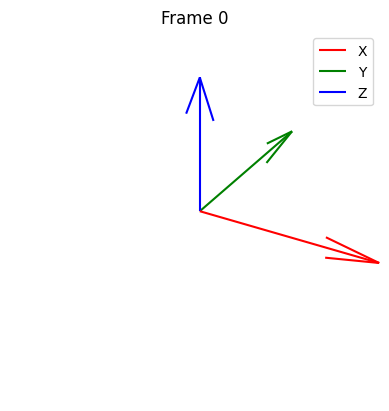

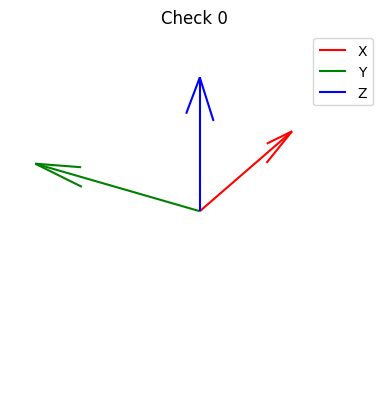

In [120]:
t_0 = draw_frame(basis = Rotation.identity(), label = "Frame 0")
check_0 = t_0.T @ draw_frame(Rotation.from_axis_angle(Z, sympy.pi/2), basis = t_0, label = "Check 0")

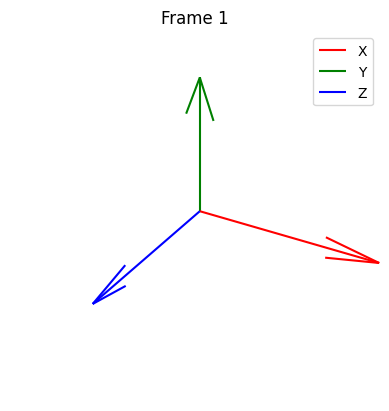

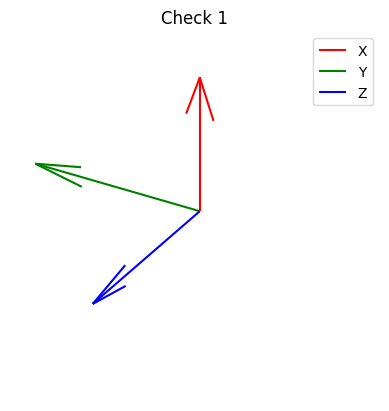

In [121]:
t_1 = draw_frame(Rotation.from_axis_angle(X, sympy.pi/2), basis = t_0, label = "Frame 1")
check_1 = draw_frame(Rotation.from_axis_angle(Z, sympy.pi/2), basis = t_1, label = "Check 1")

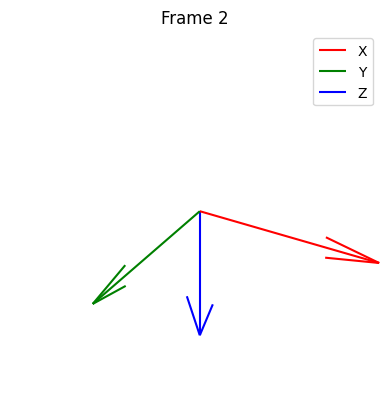

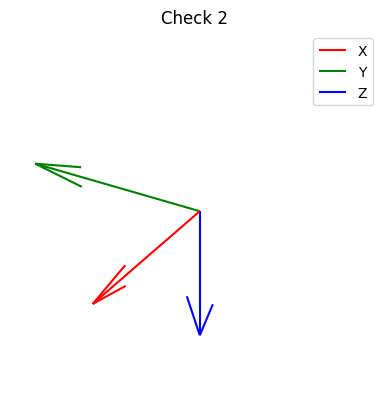

In [122]:
t_2 = draw_frame(Rotation.from_axis_angle(X, sympy.pi/2), basis = t_1, label = "Frame 2")
check_2 = draw_frame(Rotation.from_axis_angle(Z, sympy.pi/2), basis = t_2, label = "Check 2")

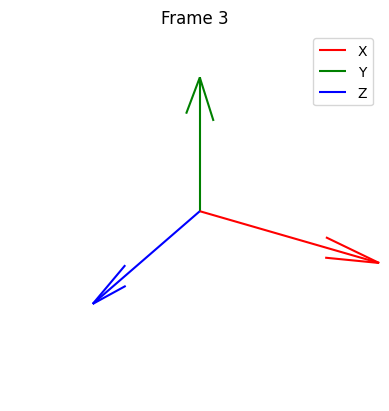

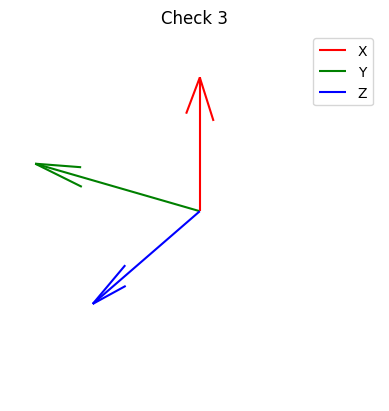

In [123]:
t_3 = draw_frame(Rotation.from_axis_angle(X, -sympy.pi/2), basis = t_2, label = "Frame 3")
check_3 = draw_frame(Rotation.from_axis_angle(Z, sympy.pi/2), basis = t_3, label = "Check 3")

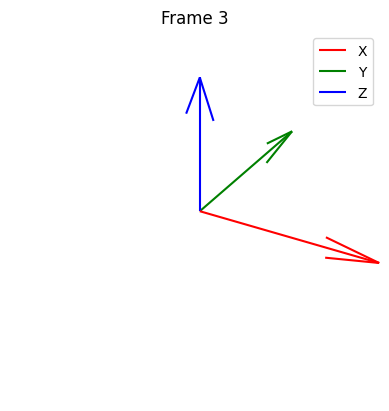

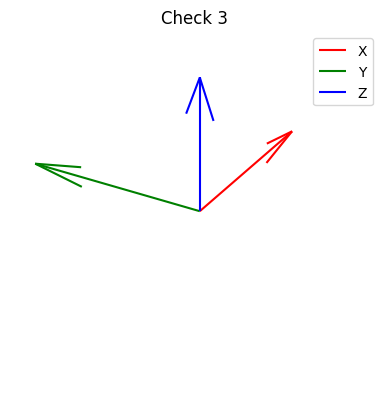

In [124]:
t_4 = draw_frame(Rotation.from_axis_angle(X, -sympy.pi/2), basis = t_3, label = "Frame 3")
check_4 = draw_frame(Rotation.from_axis_angle(Z, sympy.pi/2), basis = t_4, label = "Check 3")

In [125]:
joint_types = [JointType.REVOLUTE, JointType.REVOLUTE,JointType.REVOLUTE,JointType.REVOLUTE,JointType.REVOLUTE]
x_rotations = []

In [144]:
list(map(lambda args: print(args[0].__call__(args[1]).evalf()),zip([sympy.sin,sympy.cos],[1,2
])))

0.841470984807897
-0.416146836547142


[None, None]

[0.841470984807897, -0.416146836547142, 1.24904577239825]